In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

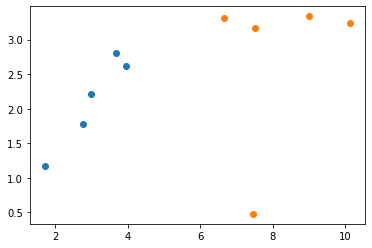

In [2]:
data = pd.read_excel("08-ClassificationAndRegressionTrees.xlsx", usecols=[0, 1, 2], header=2)[:10].astype(np.float64)
plt.scatter(data.X1[:5], data.X2[:5])
plt.scatter(data.X1[5:], data.X2[5:])

## Gini関数を用いて最も良い基準の値を探す
$gini = ((1 - (g1_1^2 + g1_2^2)) \times \frac{n_{g1}}{n}) + ((1 - (g2_1^2 + g2_2^2)) \times \frac{n_{g2}}{n})$

In [3]:
best_gini = 1.0
best_criteria = -1.0
for criteria in data.X1:
    # 分岐ごとにグループ分けする. 
    left0 = left1 = right0 = right1 = 0
    for d in data.itertuples():
        if d.X1 < criteria:
            if d.Y:
                left1 += 1
            else:
                left0 += 1
        else:
            if d.Y:
                right1 += 1
            else:
                right0 += 1
    
    # zero division errorの回避. 分類もできていないためcontinue. 
    left = left0 + left1
    right = right0 + right1
    if (left == 0 or right == 0): continue
        
    # 各基準ごとのgini関数の評価
    left_gini = 1 - ((left0 / left)**2 + (left1 / left)**2)
    right_gini = 1 - ((right0 / right)**2 + (right1 / right)**2)
    gini = (left_gini * (left / len(data))) + (right_gini * (right / len(data)))
    if(gini < best_gini):
        best_gini = gini
        best_criteria = criteria
        
print(best_criteria)
print(best_gini)

6.642287351
0.0


## テスト用のデータを用いて精度を確かめる

In [4]:
test = pd.read_excel("08-ClassificationAndRegressionTrees.xlsx", usecols=[0, 1, 2], header=73)[:10].astype(np.float64)

predict = np.where(test.X1 < best_criteria, 0, 1)
accuracy = (predict == test.Y).sum() / len(test)
print(str(accuracy * 100) + '%')

90.0%
